# Сокращение размерности

В каждом из заданий:
* Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков
* Попребирайте различное количество итоговых размерностей и постройте графики качества от количества размерностей. Выведите обе модели на одном графике в каждой заадче

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
np.random.seed(5)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Forward selection (2pts)

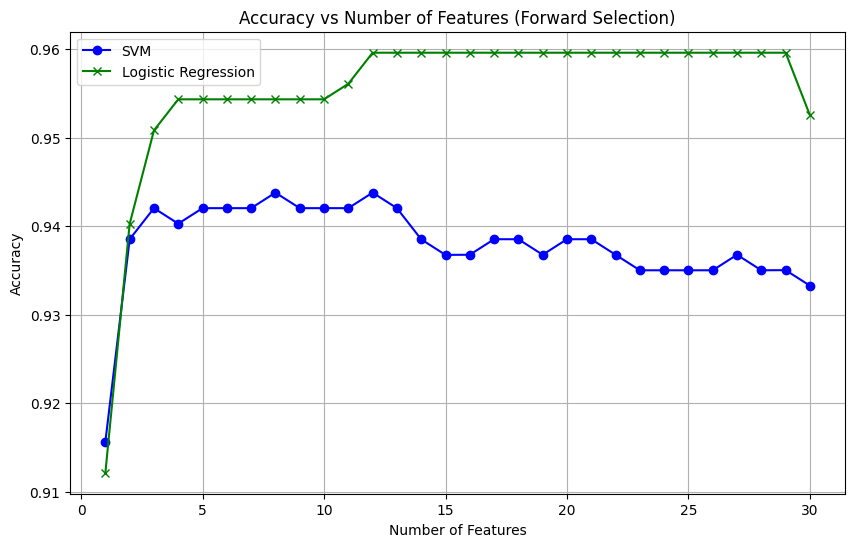

In [42]:
#code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_model = svm.SVC()
CNT_ITER = 10000
logreg_model = LogisticRegression(max_iter=CNT_ITER)

def forward_selection(X, y, model, max_features=30):
    good_features = np.array([], dtype=int)
    scores = np.array([])
    unnecessary_features = np.arange(X.shape[1])
    for _ in range(min(max_features,  X.shape[1])):
        best_score = 0
        best_feature = None
        for ind in range(len(unnecessary_features)):
            cur = np.append(good_features, unnecessary_features[ind])
            score = np.mean(cross_val_score(model, X[:, cur], y, cv=5))
            if score >= best_score:
                best_score = score
                best_feature = unnecessary_features[ind]

        good_features = np.append(good_features, best_feature)
        unnecessary_features = np.delete(unnecessary_features, ind)

        scores = np.append(scores, best_score)

    return scores

scores_svc = forward_selection(X, y, svm_model, max_features=30)
scores_log_reg = forward_selection(X, y, logreg_model, max_features=30)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), scores_svc, label="SVM", color='blue', marker='o')
plt.plot(range(1, 31), scores_log_reg, label="Logistic Regression", color='green', marker='x')
plt.title("Accuracy vs Number of Features (Forward Selection)")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Backward elimination (2pts)

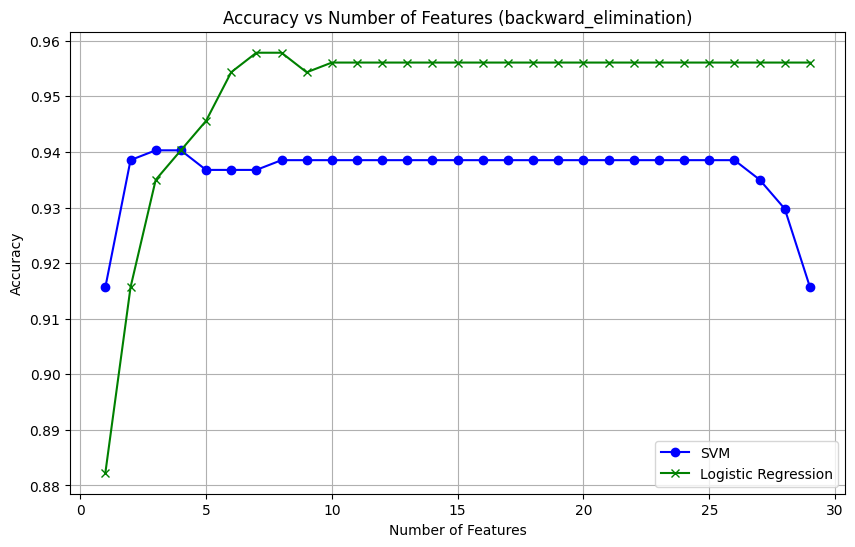

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_model = svm.SVC()
CNT_ITER = 10000
logreg_model = LogisticRegression(max_iter=CNT_ITER)

def backward_elimination(X, y, model):
    scores = np.array([])
    necessary_features = np.arange(X.shape[1])
    while len(necessary_features) > 1:
        best_score = 0
        bad_ind = None
        for ind in range(len(necessary_features)):
            cur = np.delete(necessary_features, ind)
            score = np.mean(cross_val_score(model, X[:, cur], y, cv=5))
            if score >= best_score:
                best_score = score
                bad_ind = ind
        necessary_features = np.delete(necessary_features, bad_ind)
        scores = np.append(scores, best_score)

    return np.flip(scores)

scores_svc = backward_elimination(X, y, svm_model)
scores_log_reg = backward_elimination(X, y, logreg_model)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), scores_svc, label="SVM", color='blue', marker='o')
plt.plot(range(1, 30), scores_log_reg, label="Logistic Regression", color='green', marker='x')
plt.title("Accuracy vs Number of Features (backward_elimination)")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# PCA (2 pts)


### EM алгоритм

Оставлю это тут просто чтобы пугать людей


$$
\log p(x|\theta) = \int q(z)\log p(x|\theta)dz = \int q(z)\log\dfrac{p(x,z|\theta)}{p(z|x,\theta)}dz = \int q(z)\log\dfrac{p(x,z|\theta)}{q(z)}dz+\int q(z)\log\dfrac{q(z)}{p(z|x,\theta)}dz = \mathcal{L}(q,\theta)+KL(q(z)|p(z|x,\theta))
$$

** E-step **
$$ q(z)^{(n+1)} = p(z|x,\theta^{(n)}) $$
** M-step **
$$ \theta^{(n+1)} = \max\limits_{\theta} \mathcal{L}(q^{(n+1)},\theta) $$

Обучите два классификатора (svm и огистическую регрессию на датасете данном ниже) в датасете размерность из 30 признаков. Попребирайте различное количество итоговых размерностей (до которых будет сокращать PCA) и постройте графики для обоих классификаторов. Сделайте выводы.

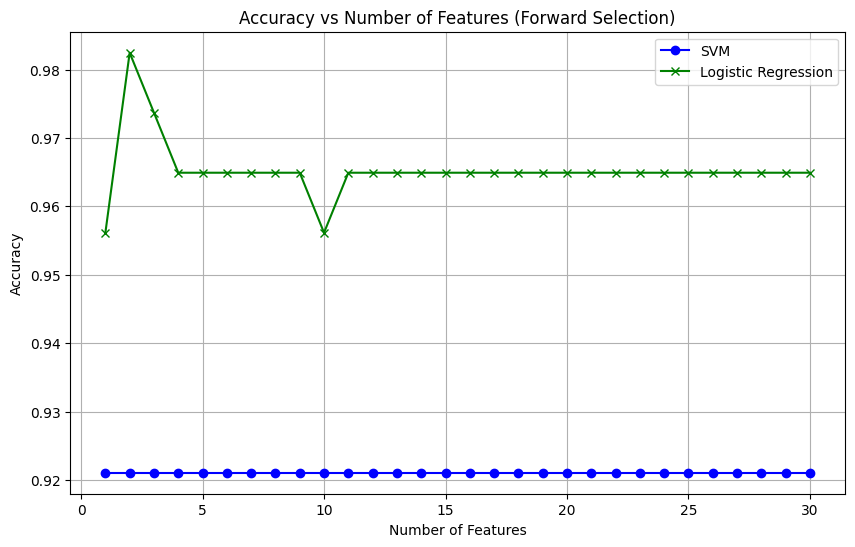

In [46]:
from sklearn.model_selection import train_test_split
svm_model = svm.SVC()
CNT_ITER = 10000
logreg_model = LogisticRegression(max_iter=CNT_ITER)

def pca(X, y, model, max_components = 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scores = np.array([])
    for n in range(1, max_components + 1):
        pca = decomposition.PCA(n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        model.fit(X_train_pca, y_train)
        scores = np.append(scores, model.score(X_test_pca, y_test))

    return scores

svm_score = pca(X, y, svm_model)
logreg_score = pca(X, y, logreg_model)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), svm_score, label="SVM", color='blue', marker='o')
plt.plot(range(1, 31), logreg_score, label="Logistic Regression", color='green', marker='x')
plt.title("Accuracy vs Number of Features (Forward Selection)")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

#  Выводы (1pts)

Точность предсказания в зависимости от количества учитываемых features вначале стремительно растёт (в случае с PCA точность сразу достигает высоких значений) и достигает некоторого потолка, выше которого она не поднимается, периодически теряя свою величину и впоследствии возвращая, однако при слишком большом количестве учитываемых features точность иногда начинает безвозвртано теряться. Таким образом для быстрого обучения модели зачастую достаточно использовать мало features - качество будет таким же, что и при большем количестве.

Работа выполнена под руководством Сайгакова Александра